In [3]:
import matplotlib.pyplot as plt
import numpy as np
from data import load
import tensorflow as tf

In [4]:
data = load("gdata")

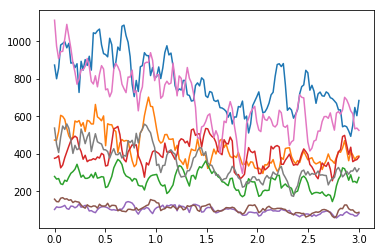

In [5]:
data2plot = data['fist'][3]
t = np.linspace(0.0, 3.0, len(data2plot))
plt.plot(t, data2plot)


In [8]:
SAMPLE_SIZE = 50
EMG_MAX = 2048
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(SAMPLE_SIZE, 8)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

_labels = {
    x: y for x, y in zip(("fuck", "fist", "like"), range(10))
}

x = []
y = []
for label, d in data.items():
    if label not in _labels:
        continue
    add_x = [_d[i:i+SAMPLE_SIZE] for _d in d for i in range(0, len(_d) - SAMPLE_SIZE, SAMPLE_SIZE//4)]
    x.extend(add_x)
    y.extend([_labels[label]] * len(add_x)) 

x = np.array(x) / EMG_MAX
y = np.array(y)

print(x.shape)
model.fit(x, y, epochs=100)

(117, 50, 8)
Epoch 1/100
117/117 [==============================] - 0s 797us/sample - loss: 0.9590 - acc: 0.7265
Epoch 2/100
117/117 [==============================] - 0s 80us/sample - loss: 0.6729 - acc: 0.7009
Epoch 3/100
117/117 [==============================] - 0s 118us/sample - loss: 0.5197 - acc: 0.9829
Epoch 4/100
117/117 [==============================] - 0s 90us/sample - loss: 0.4008 - acc: 0.9829
Epoch 5/100
117/117 [==============================] - 0s 96us/sample - loss: 0.3195 - acc: 0.9402
Epoch 6/100
117/117 [==============================] - 0s 77us/sample - loss: 0.2625 - acc: 1.0000
Epoch 7/100
117/117 [==============================] - 0s 97us/sample - loss: 0.2169 - acc: 1.0000
Epoch 8/100
117/117 [==============================] - 0s 102us/sample - loss: 0.1874 - acc: 1.0000
Epoch 9/100
117/117 [==============================] - 0s 110us/sample - loss: 0.1567 - acc: 1.0000
Epoch 10/100
117/117 [==============================] - 0s 82us/sample - loss: 0.1368 - acc:

117/117 [==============================] - 0s 66us/sample - loss: 0.0033 - acc: 1.0000
Epoch 83/100
117/117 [==============================] - 0s 98us/sample - loss: 0.0032 - acc: 1.0000
Epoch 84/100
117/117 [==============================] - 0s 93us/sample - loss: 0.0031 - acc: 1.0000
Epoch 85/100
117/117 [==============================] - 0s 73us/sample - loss: 0.0031 - acc: 1.0000
Epoch 86/100
117/117 [==============================] - 0s 63us/sample - loss: 0.0030 - acc: 1.0000
Epoch 87/100
117/117 [==============================] - 0s 97us/sample - loss: 0.0029 - acc: 1.0000
Epoch 88/100
117/117 [==============================] - 0s 79us/sample - loss: 0.0029 - acc: 1.0000
Epoch 89/100
117/117 [==============================] - 0s 70us/sample - loss: 0.0028 - acc: 1.0000
Epoch 90/100
117/117 [==============================] - 0s 93us/sample - loss: 0.0028 - acc: 1.0000
Epoch 91/100
117/117 [==============================] - 0s 89us/sample - loss: 0.0027 - acc: 1.0000
Epoch 92/100


In [7]:
model.predict(x)

array([[5.74690988e-04, 9.97110724e-01, 2.31450214e-03],
       [2.25582789e-05, 9.99432862e-01, 5.44541050e-04],
       [9.71599775e-07, 9.99857306e-01, 1.41724522e-04],
       [3.33043744e-07, 9.99812424e-01, 1.87207712e-04],
       [8.40411246e-07, 9.99787986e-01, 2.11226594e-04],
       [1.33412050e-06, 9.99632478e-01, 3.66206572e-04],
       [3.03470415e-06, 9.99393702e-01, 6.03257795e-04],
       [4.27918667e-06, 9.99405265e-01, 5.90504729e-04],
       [3.10668725e-06, 9.99637485e-01, 3.59372498e-04],
       [8.21630820e-04, 9.99057353e-01, 1.20953278e-04],
       [1.56310358e-04, 9.99819815e-01, 2.39123347e-05],
       [2.04902564e-04, 9.99761760e-01, 3.33506141e-05],
       [1.15977637e-05, 9.99965787e-01, 2.26781867e-05],
       [1.86051693e-05, 9.99860406e-01, 1.20966608e-04],
       [4.24773061e-05, 9.99520540e-01, 4.37060371e-04],
       [2.54093538e-05, 9.99713600e-01, 2.61020905e-04],
       [1.26669211e-05, 9.99659896e-01, 3.27476504e-04],
       [1.08755003e-05, 9.99067